In [5]:
import sys
!{sys.executable} -m pip install pandas pyarrow fastparquet xgboost sklearn shap imblearn 
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import time


!{sys.executable} -m pip install install --extra-index http://pypi.dcai2.local --upgrade --trusted-host pypi.dcai2.local dcaitrading=='0.0.6-28-g5d447c4'
    

Looking in indexes: https://pypi.org/simple, http://pypi.dcai2.local
  Using cached install-1.3.5-py3-none-any.whl (3.2 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for dcaitrading: filename=dcaitrading-0.0.6_28_g5d447c4-py3-none-any.whl size=6448 sha256=17fd7d62aa18a315e7dc2c9392ec9b9aa15cf281e8b13488043ad6ba696321be
  Stored in directory: /home/dcai/.cache/pip/wheels/09/7d/44/4156f7995fb250ccdda0e8ec682fc761abdefd978f15456652
Failed to build dcaitrading
  Running setup.py install for dcaitrading ... done
  DEPRECATION: dcaitrading was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https://github.com/pypa/pip/issues/8368


In [13]:
pq_file = '/home/dcai/data/EURCHF/2021/5.parquet'
table = pq.read_table(pq_file)

# Convert the PyArrow table to a Pandas dataframe
df = table.to_pandas()


# Custom function to select a fixed sample size
def fixed_sample_size(group, sample_size):
    if len(group) >= sample_size:
        return group.sample(sample_size)
    else:
        return group

sample_size=20
result = df.resample('10T').apply(lambda group: fixed_sample_size(group, sample_size))
result.reset_index(level=0, inplace=True)
print(result)

print(result.info())
print(df.info())


                                   DateTime      Bid      Ask      mean  \
DateTime                                                                  
2021-01-31 22:03:08.874 2021-01-31 22:00:00  1.07926  1.08089  1.080075   
2021-01-31 22:05:02.350 2021-01-31 22:00:00  1.07926  1.08088  1.080070   
2021-01-31 22:05:02.492 2021-01-31 22:00:00  1.07922  1.08085  1.080035   
2021-01-31 22:05:04.776 2021-01-31 22:00:00  1.07922  1.08084  1.080030   
2021-01-31 22:05:23.162 2021-01-31 22:00:00  1.07922  1.08085  1.080035   
...                                     ...      ...      ...       ...   
2021-02-05 21:56:47.046 2021-02-05 21:50:00  1.08311  1.08344  1.083275   
2021-02-05 21:51:15.619 2021-02-05 21:50:00  1.08328  1.08340  1.083340   
2021-02-05 21:52:14.797 2021-02-05 21:50:00  1.08325  1.08339  1.083320   
2021-02-05 21:52:10.883 2021-02-05 21:50:00  1.08328  1.08344  1.083360   
2021-02-05 21:51:15.952 2021-02-05 21:50:00  1.08328  1.08345  1.083365   

                        

In [17]:
df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 1000]})
df = df.set_index([pd.Index(range(1, len(df)+1))])
print(df[df['A'] == 1000].index.values[0])

6


In [34]:
df['spread'] = df['Ask']-df['Bid']
df['spread_pip'] = df['spread']*10000.0

df.head(10)

,Bid,Ask,mean,spread,spread_pip
DateTime,,,,,
2019-12-01 22:00:03.133,1.10148,1.10250,1.101990,0.00102,10.2
2019-12-01 22:01:03.133,1.10142,1.10250,1.101960,0.00108,10.8
2019-12-01 22:02:03.133,1.10141,1.10250,1.101955,0.00109,10.9
2019-12-01 22:02:15.386,1.10140,1.10253,1.101965,0.00113,11.3
2019-12-01 22:02:15.547,1.10145,1.10250,1.101975,0.00105,10.5
2019-12-01 22:02:47.876,1.10134,1.10256,1.101950,0.00122,12.2
2019-12-01 22:02:48.107,1.10154,1.10250,1.102020,0.00096,9.6
2019-12-01 22:02:48.241,1.10134,1.10256,1.101950,0.00122,12.2
2019-12-01 22:02:48.251,1.10135,1.10257,1.101960,0.00122,12.2


In [36]:
df_small  = df[0:100]
df_small

,Bid,Ask,mean,spread,spread_pip
DateTime,,,,,
2019-12-01 22:00:03.133,1.10148,1.10250,1.101990,0.00102,10.2
2019-12-01 22:01:03.133,1.10142,1.10250,1.101960,0.00108,10.8
2019-12-01 22:02:03.133,1.10141,1.10250,1.101955,0.00109,10.9
2019-12-01 22:02:15.386,1.10140,1.10253,1.101965,0.00113,11.3
2019-12-01 22:02:15.547,1.10145,1.10250,1.101975,0.00105,10.5
...,...,...,...,...,...
2019-12-01 22:05:32.497,1.10165,1.10263,1.102140,0.00098,9.8
2019-12-01 22:05:34.070,1.10166,1.10263,1.102145,0.00097,9.7
2019-12-01 22:05:34.115,1.10166,1.10258,1.102120,0.00092,9.2


In [10]:
import math
from pandas import Series

def log_add(array_like):
    return (10*math.log10((sum([10**(i/10) for i in array_like]))))



In [57]:
## https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.pipe.html

breaks='1min'
ts2 = Series(df_small['mean'].values, index=df_small.index)
ohcl = ts2.resample(breaks).ohlc()
minMax = ts2.resample(breaks).pipe(lambda x: x.min() - x.max())
closeOpen = ts2.resample(breaks).pipe(lambda x: x.last() - x.first())

count = ts2.resample(breaks).count()

mean = ts2.resample(breaks).mean()

median = ts2.resample(breaks).median()

sem = ts2.resample(breaks).sem()

std = ts2.resample(breaks).std()

var = ts2.resample(breaks).var()

q1 = ts2.resample(breaks).quantile(q=0.25)

q3 = ts2.resample(breaks).quantile(q=0.75)

df5 = pd.concat([ohcl, minMax, closeOpen,count, mean, median, sem, std, var, q1, q3], axis=1)

df5.rename(columns={0 : 'MinMax', 1 : 'Move', 2: 'Count', 3: 'Mean', 4: 'Median', 5: 'Sem', 6: 'Std', 7: 'Var', 8: 'Q1', 9: 'Q3'}, inplace=True)

print(df5)

                         open      high       low     close   MinMax  \
DateTime                                                               
2019-12-01 22:00:00  1.101990  1.101990  1.101990  1.101990  0.00000   
2019-12-01 22:01:00  1.101960  1.101960  1.101960  1.101960  0.00000   
2019-12-01 22:02:00  1.101955  1.102020  1.101950  1.101960 -0.00007   
2019-12-01 22:03:00  1.101950  1.102220  1.101950  1.102035 -0.00027   
2019-12-01 22:04:00  1.101995  1.102375  1.101985  1.102115 -0.00039   
2019-12-01 22:05:00  1.102135  1.102715  1.101985  1.102155 -0.00073   

                         Move  Count      Mean    Median       Sem       Std  \
DateTime                                                                       
2019-12-01 22:00:00  0.000000      1  1.101990  1.101990       NaN       NaN   
2019-12-01 22:01:00  0.000000      1  1.101960  1.101960       NaN       NaN   
2019-12-01 22:02:00  0.000005      7  1.101968  1.101960  0.000009  0.000025   
2019-12-01 22:03:00  0.

In [2]:
import os
from pandas import Series

def process_df(df, breaks, label='right'):
    ts2 = Series(df['mean'].values, index=df.index)
    ohcl = ts2.resample(breaks, label=label).ohlc()
    minMax = ts2.resample(breaks, label=label).pipe(lambda x: x.min() - x.max())
    closeOpen = ts2.resample(breaks, label=label).pipe(lambda x: x.last() - x.first())

    count = ts2.resample(breaks, label=label).count()

    mean = ts2.resample(breaks, label=label).mean()

    median = ts2.resample(breaks, label=label).median()

    sem = ts2.resample(breaks, label=label).sem()

    std = ts2.resample(breaks, label=label).std()

    var = ts2.resample(breaks, label=label).var()

    q1 = ts2.resample(breaks, label=label).quantile(q=0.25)

    q3 = ts2.resample(breaks, label=label).quantile(q=0.75)

    result = pd.concat([ohcl, minMax, closeOpen,count, mean, median, sem, std, var, q1, q3], axis=1)

    result.rename(columns={0 : 'MinMax', 1 : 'Move', 2: 'Count', 3: 'Mean', 4: 'Median', 5: 'Sem', 6: 'Std', 7: 'Var', 8: 'Q1', 9: 'Q3'}, inplace=True)
    
    return result

def idx_of_non_nan(values):
    return values==values

def process_raw_many(root_dir, output_dir, breaks=['1Min', '5Min', '10Min', '15Min', '30Min', '1H', '2H', '4H', '6H', '12H', '1D']):
    args=[]
    
    print("run")
    for br in breaks:
        args.append((root_dir, output_dir, br))
        #process_raw(root_dir, output_dir, br)
    print(args)
    with Pool() as p:
        results = p.starmap(process_raw, args)
    
        
def mk_missing_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
        
def extract_instrument_and_year(path):
    tokens = path.split('/')
    return tokens[-2], tokens[-1]

def process_raw_mock(root_dir, output_dir, br):
    print("{}-{}-{}".format(root_dir, output_dir, br))


def process_raw(root_dir, output_dir, br):
    print("doing {}-{}-{}".format(root_dir, output_dir, br))
    filenames = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            # Check if the file is a CSV file
            if file.endswith('.parquet'):
                
                
                instrument, year = extract_instrument_and_year(root)
                parquet_file_result = os.path.join(output_dir, instrument, year, "{0}-{1}".format(br,file))
                
                mk_missing_dir(os.path.dirname(parquet_file_result))
                
                parquet_file = os.path.join(root, file)
                table = pq.read_table(parquet_file)
                # Convert the PyArrow table to a Pandas dataframe
                df = table.to_pandas()

                df = process_df(df, br)
                df = df.loc[idx_of_non_nan(df['Sem'].values)]
                pq.write_table(pa.Table.from_pandas(df), parquet_file_result)
                #print(f'Done {parquet_file_result}')    

In [4]:
import datetime, itertools, os, glob, shutil
from io import BytesIO
import gzip
import urllib.request
import pathlib
import os
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import time
from multiprocessing import Pool



breaks=['1Min', '5Min', '10Min', '15Min', '30Min', '1H', '2H', '4H', '6H', '12H', '1D']

args=[{'/home/dcai/data/EURCHF', '/home/dcai/data/candles-right'},
     {'/home/dcai/data/EURUSD', '/home/dcai/data/candles-right'},
     {'/home/dcai/data/GBPCHF', '/home/dcai/data/candles-right'},
     {'/home/dcai/data/GBPUSD', '/home/dcai/data/candles-right'}]



start_time = time.time()

#process_raw_many('/home/dcai/data/EURCHF', '/home/dcai/data/candles', breaks)
process_raw_many('/home/dcai/data/EURUSD', '/home/dcai/data/candles-right', breaks)
#process_raw_many('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', breaks)
#process_raw_many('/home/dcai/data/EURGBP', '/home/dcai/data/candles', breaks)
end_time = time.time()

elapsed_time = end_time - start_time
print(f'Execution time: {elapsed_time:.3f} seconds')

run
[('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '1Min'), ('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '5Min'), ('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '10Min'), ('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '15Min'), ('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '30Min'), ('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '1H'), ('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '2H'), ('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '4H'), ('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '6H'), ('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '12H'), ('/home/dcai/data/EURCHF', '/home/dcai/data/candles-right', '1D')]
doing /home/dcai/data/EURCHF-/home/dcai/data/candles-right-15Mindoing /home/dcai/data/EURCHF-/home/dcai/data/candles-right-5Mindoing /home/dcai/data/EURCHF-/home/dcai/data/candles-right-1Mindoing /home/dcai/data/EURCHF-/home/dcai/data/candles-r

In [7]:
import os 
def read_in_ticks(root_dir, instrument):
    
    print("{} - {}".format(instrument, root_dir))
    dfs = []
    instrument_root = os.path.join(root_dir, instrument)
    print(instrument_root)
    for root, dirs, files in os.walk(instrument_root):
        for file in files:
            # Check if the file is a CSV file
            if file.endswith('.parquet'):
                parquet_file = os.path.join(root, file)
                dfs.append(pq.ParquetFile(parquet_file).read().to_pandas())

    result = pd.concat(dfs).sort_index()
    return result
    
start_time = time.time()
data = read_in_ticks('/home/dcai/data', 'EURCHF')
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Execution time: {elapsed_time:.3f} seconds')
print(data.info())

EURCHF - /home/dcai/data
/home/dcai/data/EURCHF
Execution time: 20.899 seconds
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252843453 entries, 2018-01-01 23:00:23.705000 to 2022-12-23 21:59:00.012000
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Bid         float64
 1   Ask         float64
 2   mean        float64
 3   spread      float64
 4   spread_pip  float64
dtypes: float64(5)
memory usage: 11.3 GB
None


In [7]:
import sys
!{sys.executable} -m pip install install --extra-index http://pypi.dcai2.local --upgrade --trusted-host pypi.dcai2.local dcaitrading==0.0.6-18-g6e9e5b1



Looking in indexes: https://pypi.org/simple, http://pypi.dcai.local
  Created wheel for dcaitrading: filename=dcaitrading-0.0.6_15_gbb8c2d5-py3-none-any.whl size=4471 sha256=22f4495db94bb76e58a2547a10fe39670de5c5a8c83e601dfb9c3da3e524a440
  Stored in directory: /home/dcai/.cache/pip/wheels/e4/eb/a3/4595252fd7a404881ad06712de5c621cb25e5db2364e5e57af
Failed to build dcaitrading
  Attempting uninstall: dcaitrading
    Found existing installation: dcaitrading 0.0.6-14-g452445d
    Uninstalling dcaitrading-0.0.6-14-g452445d:
      Successfully uninstalled dcaitrading-0.0.6-14-g452445d
    Running setup.py install for dcaitrading ... done
  DEPRECATION: dcaitrading was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [3]:

import featureeng.features as fe
from featureeng.features import *
import pandas as pd
import time


feature_list=['close_MIN_1D_5',
'close_MIN_1D_20',
'close_MIN_1D_60',
'close_MAX_1D_5',
'close_MAX_1D_20',
'close_MAX_1D_60',
'close_AVG_1D_5',
'close_AVG_1D_20',
'close_AVG_1D_60',
'close_STDEV_1D_5',
'close_STDEV_1D_20',
'close_STDEV_1D_60',
'close_MEDIAN_1D_5',
'close_MEDIAN_1D_20',
'close_MEDIAN_1D_60']

feature_date = '2022-03-29 08:55:00'
feature_date = pd.to_datetime(feature_date)



start_time = time.time()
for i in range(0,1000):
    feat = calc_features(feature_list, candles_dict, 0.999, feature_date)
end_time = time.time()
print(f'Execution time: {end_time - start_time:.3f} seconds')


print(feat)

Execution time: 5.808 seconds
[1.0231781781781784, 1.0065765765765766, 1.0016216216216216, 1.0338338338338338, 1.0400550550550551, 1.0609759759759758, 1.0264314314314313, 1.0268313313313313, 1.0361222055388724, 0.004403245422632388, 0.0076779678649459586, 0.013433881381171655, 1.0243193193193194, 1.0270745745745746, 1.0378353353353353]


In [26]:
import sys
!{sys.executable} -m pip install holidays  pandas_market_calendars

     |████████████████████████████████| 98 kB 4.6 MB/s eta 0:00:011
     |████████████████████████████████| 189 kB 9.1 MB/s eta 0:00:01


In [44]:
from datetime import date
import holidays

nyse_holidays = holidays.financial_holidays('ECB')

print(nyse_holidays.get('2014-04-01'))

None


In [1]:
from datetime import date, timedelta
from featureeng.times import *

start_date = date(2018, 1, 1)
start_date_0 = start_date
end_date = date(2022, 12, 31)
delta = timedelta(days=1)

filtered_dates = []
while start_date <= end_date:
    if start_date.weekday() < 5:
        filtered_dates.append(start_date.strftime('%Y-%m-%d'))
    start_date += delta

print(len(filtered_dates))

1305


In [1]:
import featureeng as feng
import data.readers as rd
import time

data = None

breaks=['1Min', '5Min', '10Min', '15Min', '30Min', '1H', '2H', '4H', '6H', '12H', '1D']
instrument = 'EURCHF'


start_time = time.time()
ticks_EURCHF = rd.read_in_ticks('/home/dcai/data', instrument)

candles_dict = dict()
for br in breaks:
    candles_dict[br] = rd.read_in_candles('/home/dcai/data/candles', 'EURCHF', br, year = None)

end_time = time.time()
print(f'Execution time: {end_time - start_time:.3f} seconds')


EURCHF - /home/dcai/data
/home/dcai/data/EURCHF
EURCHF - /home/dcai/data/candles
EURCHF - /home/dcai/data/candles
EURCHF - /home/dcai/data/candles
EURCHF - /home/dcai/data/candles
EURCHF - /home/dcai/data/candles
EURCHF - /home/dcai/data/candles
EURCHF - /home/dcai/data/candles
EURCHF - /home/dcai/data/candles
EURCHF - /home/dcai/data/candles
EURCHF - /home/dcai/data/candles
EURCHF - /home/dcai/data/candles
Execution time: 17.912 seconds


In [2]:
import sys
!{sys.executable} -m pip install holidays  pandas_market_calendars
from datetime import date, timedelta
import featureeng
from featureeng.times import get_trading_times_for_london_ny


start_date = date(2018, 4, 15)
end_date = date(2022, 12, 29)

join = get_trading_times_for_london_ny(start_date=start_date, end_date=end_date)

print(join)



print(join.dtypes)

            market_open_london     market_close_ny
2018-04-16 2018-04-16 07:00:00 2018-04-16 21:00:00
2018-04-17 2018-04-17 07:00:00 2018-04-17 21:00:00
2018-04-18 2018-04-18 07:00:00 2018-04-18 21:00:00
2018-04-19 2018-04-19 07:00:00 2018-04-19 21:00:00
2018-04-20 2018-04-20 07:00:00 2018-04-20 21:00:00
...                        ...                 ...
2022-12-21 2022-12-21 08:00:00 2022-12-21 22:00:00
2022-12-22 2022-12-22 08:00:00 2022-12-22 22:00:00
2022-12-23 2022-12-23 08:00:00 2022-12-23 22:00:00
2022-12-28 2022-12-28 08:00:00 2022-12-28 22:00:00
2022-12-29 2022-12-29 08:00:00 2022-12-29 22:00:00

[1163 rows x 2 columns]
market_open_london    datetime64[ns]
market_close_ny       datetime64[ns]
dtype: object


In [4]:
import time
from featureeng.features import *

feature_list=['close_MIN_1D_5',
'close_MIN_1D_20',
'close_MIN_1D_60',
'close_MAX_1D_5',
'close_MAX_1D_20',
'close_MAX_1D_60',
'close_AVG_1D_5',
'close_AVG_1D_20',
'close_AVG_1D_60',
'close_STDEV_1D_5',
'close_STDEV_1D_20',
'close_STDEV_1D_60',
'close_MEDIAN_1D_5',
'close_MEDIAN_1D_20',
'close_MEDIAN_1D_60',
'close_MIN_1H_5',
'close_MIN_1H_20',
'close_MIN_1H_60',
'close_MAX_1H_5',
'close_MAX_1H_20',
'close_MAX_1H_60',
'close_AVG_1H_5',
'close_AVG_1H_20',
'close_AVG_1H_60',
'close_STDEV_1H_5',
'close_STDEV_1H_20',
'close_STDEV_1H_60',
'close_MEDIAN_1H_5',
'close_MEDIAN_1H_20',
'close_MEDIAN_1H_60']

are_trading_feats = ['London', 'NY']

ma_feats = ['rolling_1D_60_3', 'ewm_1D_60_3','rolling_1D_20_4', 'ewm_1D_20_4','rolling_4H_20_4', 'ewm_4H_20_4']


all_features = {
    'simple': feature_list,
    'trading_regions': are_trading_feats,
    'ma': ma_feats
}

In [12]:
start_time = time.time()

for index, row in join[0:1].iterrows():
    print("{} . {} . {}".format(index, row['market_open_london'], row['market_close_ny']))
 

    ticks_for_day = ticks_EURCHF[row['market_open_london'].strftime('%Y-%m-%d %H:%M:%S'):row['market_close_ny'].strftime('%Y-%m-%d %H:%M:%S')]
    
    result = calc_features_for_day(feature_list=all_features, 
                      candles_dict=candles_dict, 
                      ticks_for_day=ticks_for_day, 
                      sample_frac=0.01)
    
end_time = time.time()
print(f'Execution time: {end_time - start_time:.3f} seconds')

2018-04-16 00:00:00 . 2018-04-16 07:00:00 . 2018-04-16 21:00:00
Execution time: 8.864 seconds


In [6]:
import multiprocessing
import time
import threading


def process_features_for_day(all_features, candles_dict, ticks_for_day, sample_frac=0.01):
    result = calc_features_for_day(feature_list=all_features, 
                      candles_dict=candles_dict, 
                      ticks_for_day=ticks_for_day, 
                      sample_frac=sample_frac)
    

args = []


start_time = time.time()




group_size = 20
for i in range(0, len(join[0:60]), group_size):
    group = join[i:i+group_size]
    for index, row in group.iterrows():
        # access data for each column by column name
        print("{} . {} . {}".format(index, row['market_open_london'], row['market_close_ny']))
       
        ticks_for_day = ticks_EURCHF[row['market_open_london'].strftime('%Y-%m-%d %H:%M:%S'):row['market_close_ny'].strftime('%Y-%m-%d %H:%M:%S')]
        args.append((all_features, candles_dict, ticks_for_day, 0.1))
    
    print("doing group {}".format(i))
    with multiprocessing.Pool() as pool:
            # Process the CSV files concurrently
            pool.starmap(process_features_for_day, args)

            
end_time = time.time()
print(f'Execution time: {end_time - start_time:.3f} seconds')

2018-04-16 00:00:00 . 2018-04-16 07:00:00 . 2018-04-16 21:00:00
2018-04-17 00:00:00 . 2018-04-17 07:00:00 . 2018-04-17 21:00:00
2018-04-18 00:00:00 . 2018-04-18 07:00:00 . 2018-04-18 21:00:00
2018-04-19 00:00:00 . 2018-04-19 07:00:00 . 2018-04-19 21:00:00
2018-04-20 00:00:00 . 2018-04-20 07:00:00 . 2018-04-20 21:00:00
2018-04-23 00:00:00 . 2018-04-23 07:00:00 . 2018-04-23 21:00:00
2018-04-24 00:00:00 . 2018-04-24 07:00:00 . 2018-04-24 21:00:00
2018-04-25 00:00:00 . 2018-04-25 07:00:00 . 2018-04-25 21:00:00
2018-04-26 00:00:00 . 2018-04-26 07:00:00 . 2018-04-26 21:00:00
2018-04-27 00:00:00 . 2018-04-27 07:00:00 . 2018-04-27 21:00:00
2018-04-30 00:00:00 . 2018-04-30 07:00:00 . 2018-04-30 21:00:00
2018-05-01 00:00:00 . 2018-05-01 07:00:00 . 2018-05-01 21:00:00
2018-05-02 00:00:00 . 2018-05-02 07:00:00 . 2018-05-02 21:00:00
2018-05-03 00:00:00 . 2018-05-03 07:00:00 . 2018-05-03 21:00:00
2018-05-04 00:00:00 . 2018-05-04 07:00:00 . 2018-05-04 21:00:00
2018-05-08 00:00:00 . 2018-05-08 07:00:0

In [18]:
for index, row in join[0:20].iterrows():
    print("{} . {} . {}".format(index, row['market_open_london'], row['market_close_ny']))
    
    ticks_for_day = ticks_EURCHF[row['market_open_london'].strftime('%Y-%m-%d %H:%M:%S'):row['market_close_ny'].strftime('%Y-%m-%d %H:%M:%S')]
    args.append((all_features, candles_dict, ticks_for_day, 0.1))
    
with multiprocessing.Pool() as pool:
        # Process the CSV files concurrently
        pool.starmap(process_features_for_day, args)
        

end_time = time.time()
print(f'Execution time: {end_time - start_time:.3f} seconds')

2018-04-16 00:00:00 . 2018-04-16 07:00:00 . 2018-04-16 21:00:00
2018-04-17 00:00:00 . 2018-04-17 07:00:00 . 2018-04-17 21:00:00
2018-04-18 00:00:00 . 2018-04-18 07:00:00 . 2018-04-18 21:00:00
2018-04-19 00:00:00 . 2018-04-19 07:00:00 . 2018-04-19 21:00:00
2018-04-20 00:00:00 . 2018-04-20 07:00:00 . 2018-04-20 21:00:00
2018-04-23 00:00:00 . 2018-04-23 07:00:00 . 2018-04-23 21:00:00
2018-04-24 00:00:00 . 2018-04-24 07:00:00 . 2018-04-24 21:00:00
2018-04-25 00:00:00 . 2018-04-25 07:00:00 . 2018-04-25 21:00:00
2018-04-26 00:00:00 . 2018-04-26 07:00:00 . 2018-04-26 21:00:00
2018-04-27 00:00:00 . 2018-04-27 07:00:00 . 2018-04-27 21:00:00
2018-04-30 00:00:00 . 2018-04-30 07:00:00 . 2018-04-30 21:00:00
2018-05-01 00:00:00 . 2018-05-01 07:00:00 . 2018-05-01 21:00:00
2018-05-02 00:00:00 . 2018-05-02 07:00:00 . 2018-05-02 21:00:00
2018-05-03 00:00:00 . 2018-05-03 07:00:00 . 2018-05-03 21:00:00
2018-05-04 00:00:00 . 2018-05-04 07:00:00 . 2018-05-04 21:00:00
2018-05-08 00:00:00 . 2018-05-08 07:00:0

In [19]:
df = pd.DataFrame({'col1': range(20), 'col2': range(20, 40)})

# iterate in groups of 6
group_size = 6
for i in range(0, len(df), group_size):
    group = df[i:i+group_size]
    for index, row in group.iterrows():
        # access data for each column by column name
        print(row['col1'], row['col2'])

0 20
1 21
2 22
3 23
4 24
5 25
6 26
7 27
8 28
9 29
10 30
11 31
12 32
13 33
14 34
15 35
16 36
17 37
18 38
19 39


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure()
sns.histplot(candles_dict['4H']['2018-04-16 08:00:00':'2018-04-16 17:00:00']['MinMax']*10000, bins=300, discrete=True, binrange=(-60.0, 0))


NameError: name 'candles_dict' is not defined

<Figure size 640x480 with 0 Axes>

In [13]:
candles_dict['1H'].info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30966 entries, 2018-01-01 23:00:00 to 2022-12-23 21:00:00
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    30966 non-null  float64
 1   high    30966 non-null  float64
 2   low     30966 non-null  float64
 3   close   30966 non-null  float64
 4   MinMax  30966 non-null  float64
 5   Move    30966 non-null  float64
 6   Count   30966 non-null  int64  
 7   Mean    30966 non-null  float64
 8   Median  30966 non-null  float64
 9   Sem     30966 non-null  float64
 10  Std     30966 non-null  float64
 11  Var     30966 non-null  float64
 12  Q1      30966 non-null  float64
 13  Q3      30966 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 3.5 MB


In [49]:
import pytz

print(get_calendar('NYSE').schedule(start_date=date(2023, 1, 15), end_date=date(2023, 5, 21)))

print(datetime.now(pytz.UTC))

                         market_open              market_close
2023-01-17 2023-01-17 14:30:00+00:00 2023-01-17 21:00:00+00:00
2023-01-18 2023-01-18 14:30:00+00:00 2023-01-18 21:00:00+00:00
2023-01-19 2023-01-19 14:30:00+00:00 2023-01-19 21:00:00+00:00
2023-01-20 2023-01-20 14:30:00+00:00 2023-01-20 21:00:00+00:00
2023-01-23 2023-01-23 14:30:00+00:00 2023-01-23 21:00:00+00:00
...                              ...                       ...
2023-05-15 2023-05-15 13:30:00+00:00 2023-05-15 20:00:00+00:00
2023-05-16 2023-05-16 13:30:00+00:00 2023-05-16 20:00:00+00:00
2023-05-17 2023-05-17 13:30:00+00:00 2023-05-17 20:00:00+00:00
2023-05-18 2023-05-18 13:30:00+00:00 2023-05-18 20:00:00+00:00
2023-05-19 2023-05-19 13:30:00+00:00 2023-05-19 20:00:00+00:00

[87 rows x 2 columns]
2023-01-21 15:58:09.575339+00:00


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12220 entries, 2021-02-01 08:40:02.680000 to 2021-02-01 09:17:32.046000
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bid         12220 non-null  float64
 1   Ask         12220 non-null  float64
 2   mean        12220 non-null  float64
 3   spread      12220 non-null  float64
 4   spread_pip  12220 non-null  float64
dtypes: float64(5)
memory usage: 572.8 KB


<AxesSubplot:xlabel='DateTime'>

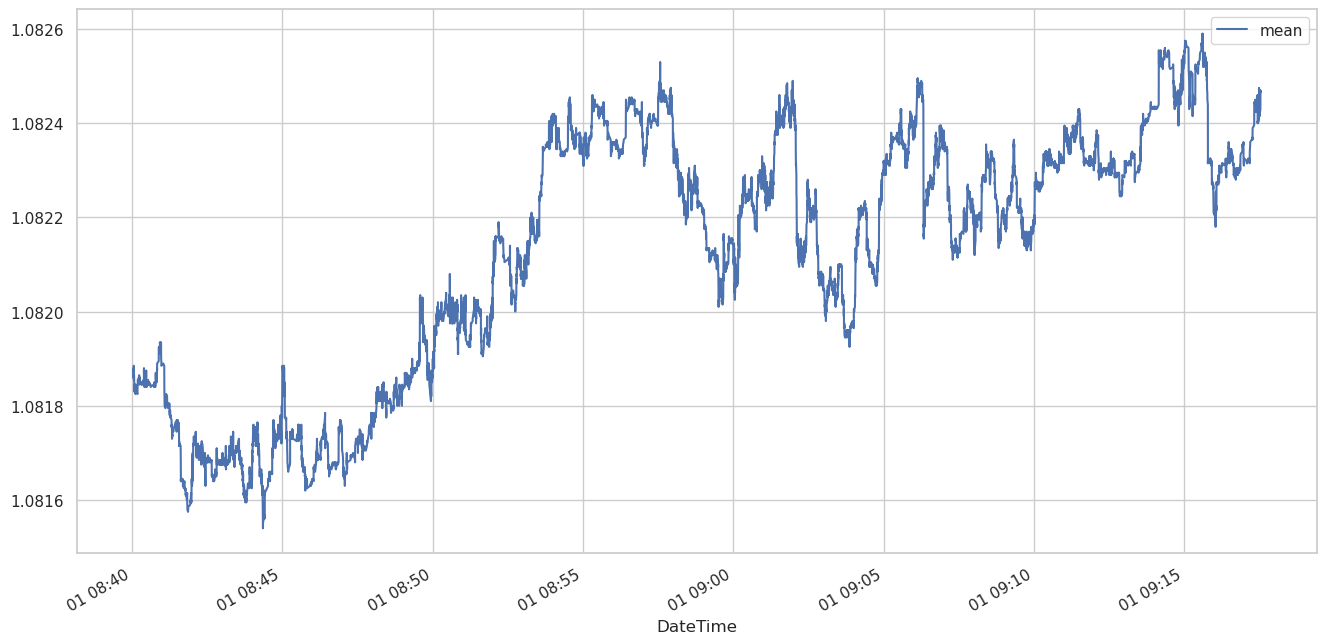

In [22]:

pq_file = '/home/dcai/test.parquet'
table = pq.read_table(pq_file)

df = table.to_pandas()
df.info()


df[['mean']].plot(label='1D EURCHF',
                                  figsize=(16, 8))

In [1]:
import numpy as np
import time
from featureeng.features import *

def syntetic_data():
    lst = np.arange(0.0, 1.1, 0.1).tolist()
    lst2 = np.arange(0.2, 1.3, 0.1).tolist()
    dates = pd.date_range(start='2022-08-15 00:00:00', end='2022-08-15 10:00:00', freq='1h')

    # Calling DataFrame constructor on list
    # with indices and columns specified
    return pd.DataFrame({'close': lst, 'open': lst2}, index=dates)

df = syntetic_data()

print(df[:'2022-08-15 10:00:00'].tail(6))


res = ma_periods_div_by_current_price('rolling',
                                              3,
                                              3,
                                              2.0,
                                              '2022-08-15 10:00:01',
                                              df).tolist()

print(res)

                     close  open
2022-08-15 05:00:00    0.5   0.7
2022-08-15 06:00:00    0.6   0.8
2022-08-15 07:00:00    0.7   0.9
2022-08-15 08:00:00    0.8   1.0
2022-08-15 09:00:00    0.9   1.1
2022-08-15 10:00:00    1.0   1.2
[0.35000000000000003, 0.4000000000000001, 0.45]


In [5]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import os
from pandas import Series


def read_parquet(save_dir, name):
    return pq.ParquetFile(os.path.join(save_dir, name)).read().to_pandas()


df = read_parquet('/home/dcai/data/features/EURCHF/4/2018', '106.parquet')

df.info()




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5703 entries, 2018-04-16 07:00:00.489000 to 2018-04-16 21:00:00.013000
Data columns (total 91 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MeanPrice              5703 non-null   float64
 1   close_MIN_1D_5         5703 non-null   float64
 2   close_MIN_1D_20        5703 non-null   float64
 3   close_MIN_1D_60        5703 non-null   float64
 4   close_MAX_1D_5         5703 non-null   float64
 5   close_MAX_1D_20        5703 non-null   float64
 6   close_MAX_1D_60        5703 non-null   float64
 7   close_AVG_1D_5         5703 non-null   float64
 8   close_AVG_1D_20        5703 non-null   float64
 9   close_AVG_1D_60        5703 non-null   float64
 10  close_STDEV_1D_5       5703 non-null   float64
 11  close_STDEV_1D_20      5703 non-null   float64
 12  close_STDEV_1D_60      5703 non-null   float64
 13  close_MEDIAN_1D_5      5703 non-null   float64
 14  close_